Data Gathering - Checking the working directory to access the data file

In [243]:
# Get working directory to save data downloaded in it
import os
os.getcwd()

'C:\\Users\\cpankaj'

# Business and Data Understanding

Data Gathering

In [ ]:
# Import required libraries and packages - required to perform the analysis steps.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('stacksurvey_results_public.csv')
df.head()

Assess Data

In [284]:
# check size of dataframe i.e. number of rows and columns
df.shape

(51392, 154)

# First Question - Whether higher educated people are more secured about jobs?

# Prepare Data

In [297]:
# Data assess
#Two fields related to this question are - FormalEducation and JobSecurity
# Checking the missing values in FormalEducation column

pd.isnull(df['FormalEducation']).sum()

0

In [283]:
#Data assess
#checking the missing value in JobSecurity column
pd.isnull(df['JobSecurity']).sum()

20152

In [49]:
#Data cleaning
new_df = df.dropna(subset = ['JobSecurity']).copy()

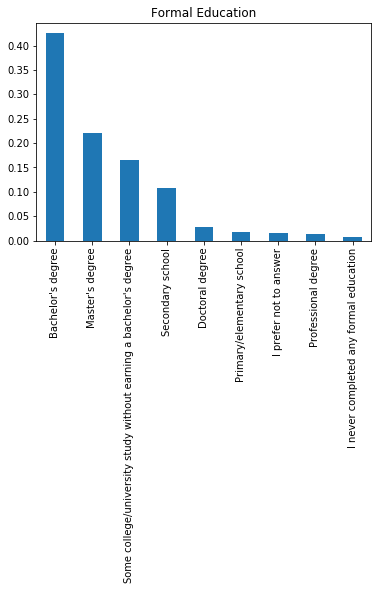

In [50]:
# Data analysis and visualization
#Proportion of data points against different types of degrees in the FormalEducation column

For_ed = new_df.FormalEducation.value_counts()

(For_ed/new_df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

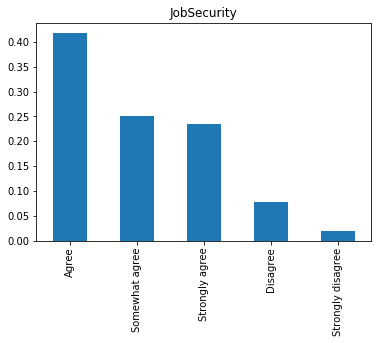

In [51]:
#Data analysis and visualization
#Proportion of data points against different types of degrees in the FormalEducation column

Job_sec = new_df.JobSecurity.value_counts()

(Job_sec/new_df.shape[0]).plot(kind="bar");
plt.title("JobSecurity");

In [288]:
#Data cleaning
#Defining a function for classification of FormalEducation into higher education (Master / Doctoral or Professional) or not

def higher_ed(formal_ed_str):
    
    '''
    This function would convert values into two categories:
    Higher Education (1) or Not (0)
    '''
    if formal_ed_str in ("Master's degree", "Doctoral degree", "Professional degree"):
        return 1
    else:
        return 0

#checking the function on dataframe for 10 values

new_df["FormalEducation"].apply(higher_ed)[:10]

# creating a new column in dataframe with binary values for deciding if respondent has higher education or not
new_df['If_higher_ed'] = new_df['FormalEducation'].apply(higher_ed)
higher_ed_perc = new_df['If_higher_ed'].mean()


In [289]:
#Data cleaning

#Defining a function for classification of JobSecurity into Secure, Not_Secure and neutral

# Defining a function for classification of FormalEducation into higher education (Master / Doctoral or Professional) or not

def secure_job(secure_job_str):
    
    '''
    This function would convert data into two categories:
    1 (Secure about jobs) and 0 (not secure about jobs)
    '''
    if secure_job_str in ("Strongly agree", "Agree","Somewhat agree"):
        return 1
    else:
        return 0

#checking the function on dataframe for 10 values

new_df["JobSecurity"].apply(secure_job)[:10]

#creating a new column in dataframe with binary values for deciding if respondent has job security or not
new_df['If_secure_job'] = df['JobSecurity'].apply(secure_job)
secure_job_perc = new_df['If_secure_job'].mean()

In [55]:
# Data analyze
new_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,If_higher_ed,If_secure_job
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN,0,1
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,0,1
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN,1,1
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees",...,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN,0,1
14,15,Professional developer,"Yes, I program as a hobby",United Kingdom,No,Employed full-time,Professional degree,Computer engineering or electrical/electronics...,All or almost all the time (I'm full-time remote),"5,000 to 9,999 employees",...,High school,White or of European descent,Somewhat agree,Agree,Disagree,Agree,100000.0,NaN,1,1


# Evaluate the results

In [56]:
#Data analysis 
#Checking proportion of values for the two columns
pd.crosstab(new_df.If_higher_ed, new_df.If_secure_job).apply(lambda r: r/r.sum(), axis=1)

If_secure_job,0,1
If_higher_ed,,
0,0.089941,0.910059
1,0.112832,0.887168


In [295]:
# From the data it seems that there is no major difference between the job security feeling of higher educated and non higher educated respondents
# ~89% higher educated respondents feels secured in job and ~91% non higher educated respondents feels secured in job.

# Second Question - Do males gets more salaries than females?

# Prepare Data

In [296]:
#Data assess
#checking null values in Gender column
pd.isnull(df['Gender']).sum()

16345

In [58]:
# Data assess
# checking null values in Salary column
pd.isnull(df['Salary']).sum()

38501

In [59]:
# Data cleaning
# dropping the missing values in salary as we are working on two features only and imputing values may result in data biasedness
rev_df = df.dropna(subset=['Salary']).copy()

In [60]:
# Data assess
# checking the NA values in new dataset
pd.isnull(rev_df['Gender']).sum()

1182

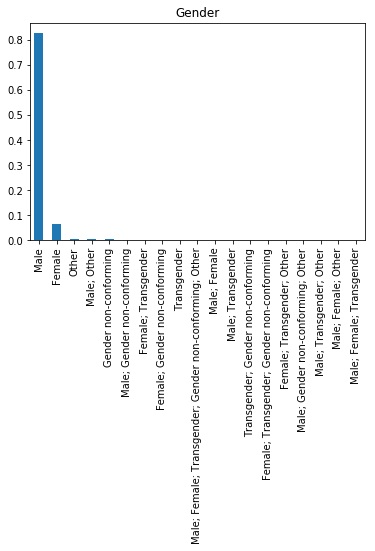

In [61]:
# Data analyze and visualization
# checking the value counts against all categories in Gender column
gen = rev_df.Gender.value_counts()

(gen/rev_df.shape[0]).plot(kind="bar");
plt.title("Gender");

In [62]:
# Data cleaning
# As most of the values are male, imputing make against missing values

rev_df['Gender'].fillna('Male' , inplace = True) 


In [63]:
# Data assess
# checking if there is any nan value remaining
pd.isnull(rev_df['Gender']).sum()

0

In [64]:
# Data cleaning
# creating a function to consolidate all values in three categories
def gen(gen_str):
    
    '''
    This function would convert data into three categories:
    Male, Female and Other.
    '''
    if gen_str == "Male":
        return "Male"
    elif gen_str == "Female":
        return "Female"
    else:
        return 'Other'
rev_df['Gender'] = rev_df['Gender'].apply(gen)

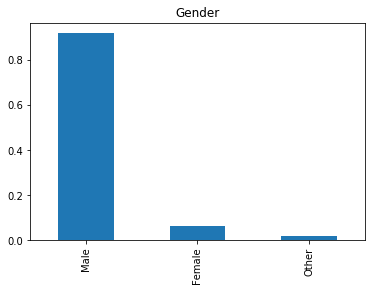

In [65]:
# Data analyze and visualization
#Checking with a bar plot if we have three categories in the gender column
gen = rev_df.Gender.value_counts()

(gen/rev_df.shape[0]).plot(kind="bar");
plt.title("Gender");

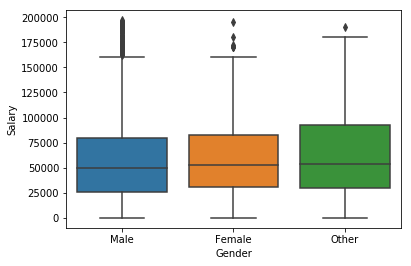

In [66]:
# Data naalyze and Visualization
# creating a box plot to check the distribution of values against each category
sns.boxplot(y = rev_df['Salary'], x = rev_df['Gender'])

# Evaluate the results

In [67]:
# Data analysis
# Getting value of salary against each category in the Gender column
rev_df[['Salary','Gender']].groupby(['Gender']).mean()

,Salary
Gender,
Female,58083.924534
Male,56073.474734
Other,61671.656678


In [ ]:
# No significant difference between salaries of males and females

# which model best predicts the average job satisfaction?

# Prepare Data

In [245]:
# Data assess
# checking the null values in JobSatisfactin column
pd.isnull(df['JobSatisfaction']).sum()

11016

In [246]:
# Data cleaning
# dropping the null values from the columns of independent variables (X) except Salary, and dependent variable (JobSatisfaction)
# imputing values here could bias the data and could impact model accuracy, its better to drop the missing values.
final_df = df.dropna(subset=['JobSatisfaction','JobSecurity','WorkStart','HoursPerWeek','CompanyType']).copy()

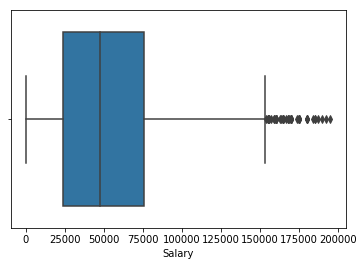

In [247]:
# Data analysis and visualization
# creating a box plot of Salary column in new dataset to check existence of outliers
sns.boxplot(final_df['Salary'])

In [248]:
# Data cleaning
# Finding Q1 and Q3 to calculate IQR and hence calculating the mean of Salary, without outliers - for imputing the same in NA cells
Q1 = final_df['Salary'].quantile(0.25)
print(Q1)

23492.560689115096


In [249]:
Q3 = final_df['Salary'].quantile(0.75)
Q3

75393.7826306247

In [250]:
IQR = Q3-Q1
IQR

51901.221941509604

In [252]:
LL = Q1-1.5*IQR
LL

-54359.27222314931

In [253]:
UL = Q3+1.5*IQR
UL

153245.6155428891

In [254]:
without_outlier = final_df[final_df['Salary']<UL]
without_outlier['Salary'].mean()

51851.79577025764

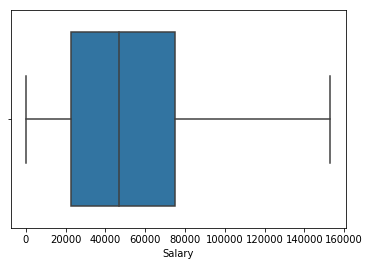

In [255]:
# Data analysis and visualization
# checking the boxplot after removing the outliers
sns.boxplot(without_outlier['Salary'])

In [256]:
# Data cleaning
# imputing the mean salary against missing values. We decided to inpute values here due to following reasons:
#1. Slary is a continuous variable and there are multiple options to impute the values.
#2. Left with very less data points after removing all the categorical missing values. Its better to have more data points for better accuracy of the model.
final_df['Salary']=final_df['Salary'].fillna(without_outlier['Salary'].mean())

In [257]:
#converting JobSatisfaction from string to integer

final_df['JobSatisfaction'] = pd.to_numeric(final_df['JobSatisfaction'], errors='coerce')

In [258]:
# Data cleaning
# Creating a function to convert Jobsatisfaction into two categoris

def job_sat(job_sat_str):
    
    '''
    This function would convert data into two categories:
    Satisfied (6 and above rating) and Dissatisfied (below 6 rating)
    '''
    
    if job_sat_str < 6:
        return 'Dissatisfied'
    else:
        return 'Satisfied'
    

final_df['JobSatisfaction'] = final_df['JobSatisfaction'].apply(job_sat)
final_df['JobSatisfaction'].value_counts()

Satisfied       6021
Dissatisfied    2583
Name: JobSatisfaction, dtype: int64

In [266]:
# Data cleaning
# converting y into categorical codes

final_df.JobSatisfaction = pd.Categorical(final_df.JobSatisfaction)
final_df['JobSatisfaction'] = final_df.JobSatisfaction.cat.codes

In [265]:
# converting CompanyType variable into categorical codes

final_df.CompanyType = pd.Categorical(final_df.CompanyType)
final_df['CompanyType'] = final_df.CompanyType.cat.codes

In [263]:
# converting WorkStart variable into categorical codes

final_df.WorkStart = pd.Categorical(final_df.WorkStart)
final_df['WorkStart'] = final_df.WorkStart.cat.codes

In [264]:
# converting JobSecurity variable into categorical codes

final_df.JobSecurity = pd.Categorical(final_df.JobSecurity)
final_df['JobSecurity'] = final_df.JobSecurity.cat.codes

In [267]:
# Defining X and Y variables

y = ['JobSatisfaction']
features = ['Salary', 'CompanyType', 'JobSecurity','HoursPerWeek', 'WorkStart']

In [268]:
# creating arrays of X and Y

X = np.array(final_df[features])
y = np.array(final_df['JobSatisfaction'])

In [269]:
X

array([[5.18517958e+04, 3.00000000e+00, 2.00000000e+00, 5.00000000e+00,
        2.00000000e+01],
       [5.18517958e+04, 5.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        2.00000000e+01],
       [5.18517958e+04, 5.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       ...,
       [5.18517958e+04, 5.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        2.30000000e+01],
       [5.80000000e+04, 1.00000000e+00, 3.00000000e+00, 5.00000000e+00,
        2.00000000e+01],
       [4.00000000e+04, 7.00000000e+00, 2.00000000e+00, 1.00000000e+00,
        7.00000000e+00]])

In [270]:
y

array([0, 1, 1, ..., 0, 0, 1], dtype=int8)

# Data Modeling

In [271]:
# splitting data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [272]:
# creating a logistic regression model

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

C:\Users\cpankaj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [273]:
# predicting the model results on y test

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.00      0.00       783
           1       0.70      1.00      0.82      1799

   micro avg       0.70      0.70      0.70      2582
   macro avg       0.45      0.50      0.41      2582
weighted avg       0.55      0.70      0.57      2582



# Evaluate the results

In [274]:
# finding roc_aur_score and f1 score of the model

print("roc_auc_score: ", metrics.roc_auc_score(y_test, y_pred))
print("f1 score: ", metrics.f1_score(y_test, y_pred))

roc_auc_score:  0.499526840865899
f1 score:  0.8203839122486289


# Data Modeling

In [275]:
# Creating the random forest model

reg_rf = RandomForestClassifier()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)

C:\Users\cpankaj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [236]:
# predicting the model resulrs on y test

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.26      0.31       783
           1       0.72      0.82      0.77      1799

   micro avg       0.65      0.65      0.65      2582
   macro avg       0.55      0.54      0.54      2582
weighted avg       0.62      0.65      0.63      2582



# Evaluate the results

In [276]:
# calculating the roc_auc_score and f1 score of the model

print("roc_auc_score: ", metrics.roc_auc_score(y_test, y_pred))
print("f1 score: ", metrics.f1_score(y_test, y_pred))

roc_auc_score:  0.5413394840471186
f1 score:  0.7521231422505308


# Data Modeling

In [277]:
# creating a KNN model

reg_knn = KNeighborsClassifier()
reg_knn.fit(X_train, y_train)
y_pred = reg_knn.predict(X_test)

In [279]:
# predicting the model results in y test

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.22      0.28       783
           1       0.71      0.84      0.77      1799

   micro avg       0.65      0.65      0.65      2582
   macro avg       0.55      0.53      0.53      2582
weighted avg       0.61      0.65      0.62      2582



# Evaluate the results

In [280]:
# finding the roc_auc_score and f1 score of the model

print("roc_auc_score: ", metrics.roc_auc_score(y_test, y_pred))
print("f1 score: ", metrics.f1_score(y_test, y_pred))

roc_auc_score:  0.5320129602297857
f1 score:  0.7732247391193687


In [ ]:
# out of three classification models created - Random Forest model has better results than the other two - roc_auc_score is 0.54 and recall rate is 0.75